In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [122]:
d3=pd.read_csv('diabetes.csv')
d3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
d3.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [124]:
d3.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [125]:
#there are no null values in this dataset

In [126]:
d3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [127]:
#there are 768 rows in this dataset.
#there is great difference between 75% and maximum for insulin,age,glucose and blood pressure.so there are chances for presence of outliers.

In [128]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [129]:
d3.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [130]:
#There are 500 cases with no diabetes and 268 cases with diabetes

In [131]:
dcor=d3.corr()
dcor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


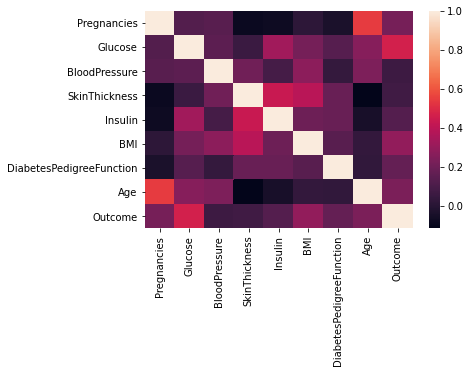

In [132]:
sns.heatmap(dcor)

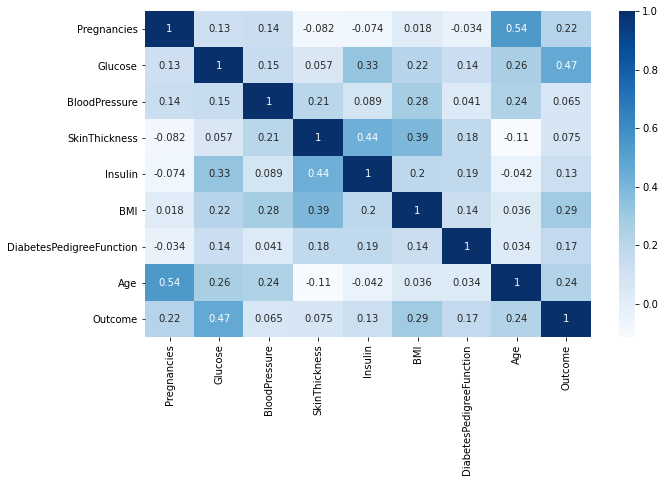

In [133]:
plt.figure(figsize=(10,6))
sns.heatmap(dcor,cmap='Blues',annot=True)

In [134]:
#Here we can see that the target column "outcome" has no negative relation with the attributes.
#ie,diabetes may occur due to all these attributes,but its dependency varies with each person
#the outcome has greater relation with the glucose level.diabetes occur mainly due to the glucose level in blood 
#outcome has less relation with BMI,age and pregnancies
#outcome has a poor but positive relation with bloodpressure,skinthickness and diabetespedigree function

In [135]:
collist=d3.columns.values
ncol=12
nrows=7

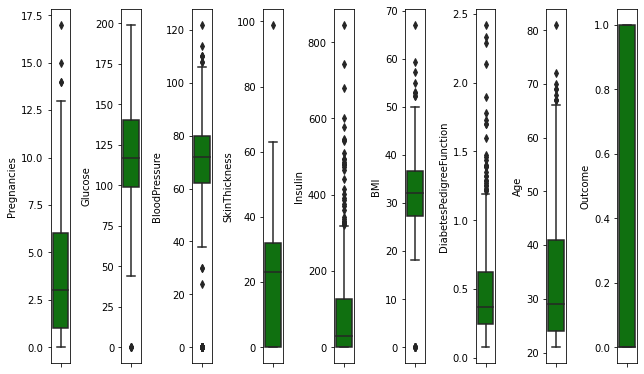

In [136]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d3[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [137]:
d3.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [138]:
#here we can see blood pressure,insulin,diabetes pedigree function and age are highly skewed datas.so lets resolve it using log method

In [139]:
for col in d3.columns:
    if d3.skew().loc[col]>0.55:
        d3[col]=np.log1p(d3[col])

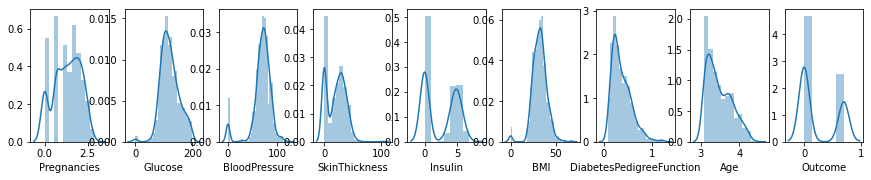

In [140]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d3[collist[i]])

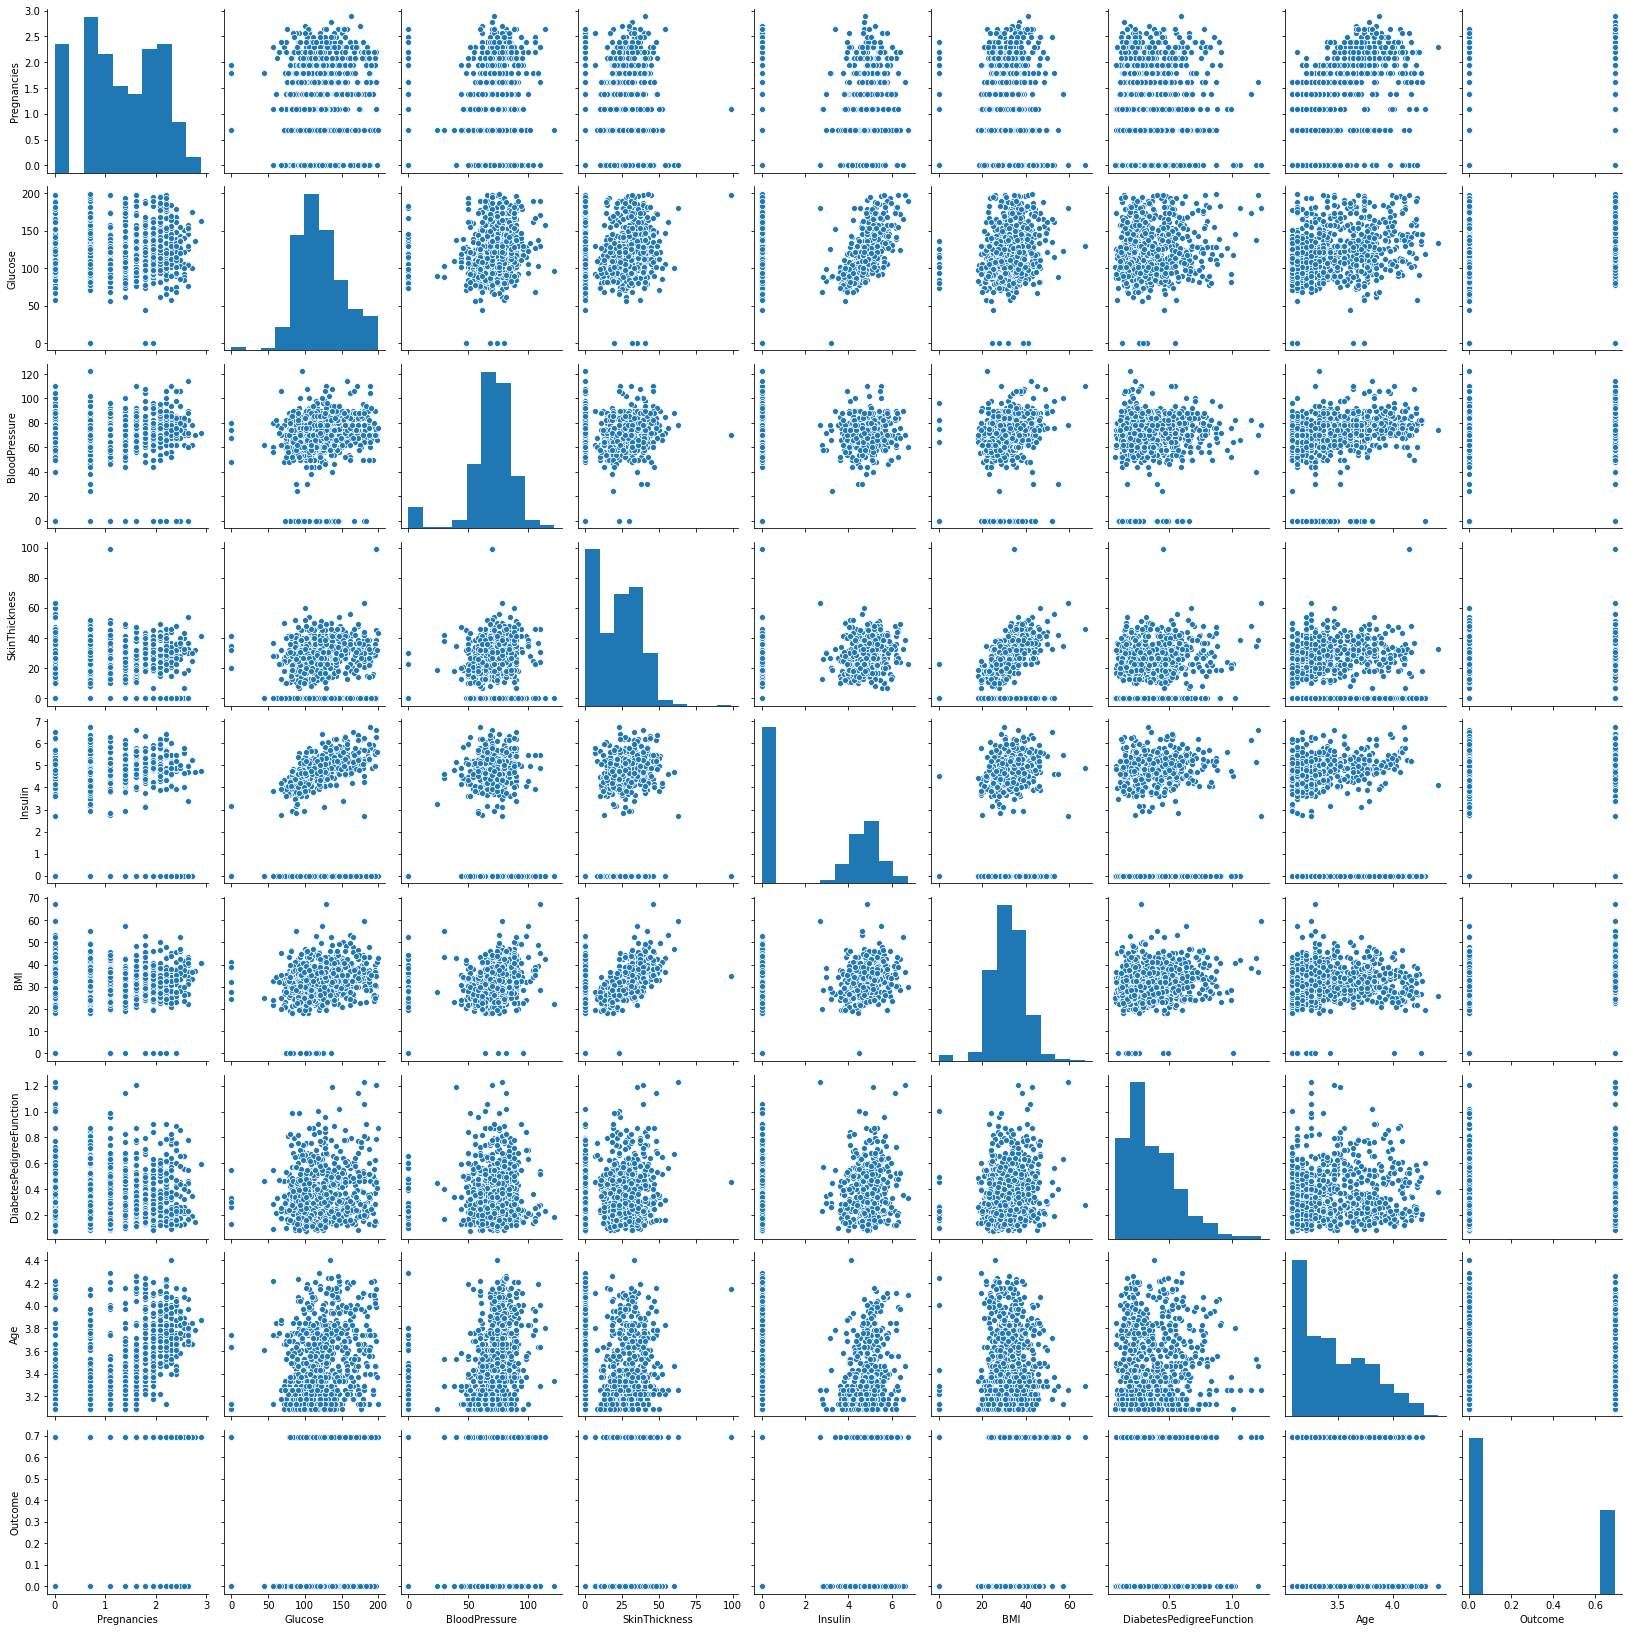

In [141]:
sns.pairplot(d3)

In [142]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(d3))
z

array([[0.82578131, 0.84832379, 0.14964075, ..., 0.61205873, 1.43776741,
        1.36589591],
       [0.80260428, 1.12339636, 0.16054575, ..., 0.3249939 , 0.05057458,
        0.73212021],
       [1.15244868, 1.94372388, 0.26394125, ..., 0.74958593, 0.04768708,
        1.36589591],
       ...,
       [0.6254108 , 0.00330087, 0.14964075, ..., 0.73687721, 0.15195618,
        0.73212021],
       [0.80260428, 0.1597866 , 0.47073225, ..., 0.33246179, 1.24417772,
        1.36589591],
       [0.80260428, 0.8730192 , 0.04624525, ..., 0.46113844, 0.96921595,
        0.73212021]])

In [143]:
threshold=3
print(np.where(z>3))

(array([  4,   7,   9,  15,  45,  49,  49,  58,  60,  60,  75,  78,  81,
        81, 145, 172, 177, 182, 193, 222, 228, 261, 266, 269, 300, 332,
       336, 342, 347, 349, 357, 370, 371, 371, 426, 426, 430, 435, 445,
       445, 453, 468, 484, 494, 494, 502, 522, 522, 533, 535, 579, 589,
       593, 601, 604, 619, 621, 643, 673, 684, 697, 703, 706, 706],
      dtype=int64), array([6, 2, 5, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 5, 2, 5, 1, 2, 2, 6, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 6, 5, 6, 2, 5, 2, 2, 5, 6, 2, 2, 2, 2,
       5, 1, 2, 5, 2, 2, 3, 2, 6, 2, 2, 2, 6, 2, 5, 5, 2, 2, 2, 5],
      dtype=int64))


In [144]:
d3_new=d3[(z<3).all(axis=1)]
print(d3.shape)
print(d3_new.shape)

(768, 9)
(713, 9)


In [145]:
#55 rows are deleted due to presence of outliers

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [147]:
x=d3_new.iloc[:,0:-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.945910,148,72,35,0.000000,33.6,0.486738,3.931826
1,0.693147,85,66,29,0.000000,26.6,0.300845,3.465736
2,2.197225,183,64,0,0.000000,23.3,0.514021,3.496508
3,0.693147,89,66,23,4.553877,28.1,0.154436,3.091042
5,1.791759,116,74,0,0.000000,25.6,0.183155,3.433987


In [148]:
y=d3_new.iloc[:,-1]
y.head()

0    0.693147
1    0.000000
2    0.693147
3    0.000000
5    0.000000
Name: Outcome, dtype: float64

In [149]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.81186607,  0.8723545 , -0.02932504, ...,  0.19514795,
         0.69849683,  1.42080576],
       [-0.83651914, -1.19907817, -0.51937403, ..., -0.86066062,
        -0.31482059, -0.06296233],
       [ 1.14254554,  2.02315043, -0.68272369, ..., -1.35839895,
         0.8472171 ,  0.03499736],
       ...,
       [ 0.60903465, -0.01540236, -0.02932504, ..., -0.92099254,
        -0.76022624, -0.16403236],
       [-0.83651914,  0.14899706, -1.00942302, ..., -0.33275634,
        -0.32289628,  1.22781099],
       [-0.83651914, -0.9360391 , -0.19267471, ..., -0.2875074 ,
        -0.46204566, -0.97878057]])

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=52)

In [155]:
lr=LogisticRegression()

In [156]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

ValueError: Unknown label type: 'continuous'

In [157]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [158]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

AttributeError: 'LogisticRegression' object has no attribute 'classes_'

In [159]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

NameError: name 'y_pred_prob' is not defined